#Titanic 数据探索性分析（EDA）与清洗
#项目目标：清洗数据、可视化生存影响因素
#作者：陈育桦（数据分析练习）
#数据来源：Kaggle Titanic

In [1]:
#导入必要库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#设置中文字体（避免图表中文乱码）
plt.rcParams['font.sans-serif'] = ['SimHei'] #黑体
plt.rcParams['axes.unicode_minus'] = False

#读取在线Titanic数据（不用下载）
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

#显示前五行 + 基本信息
display(df.head())
df.info()
print("缺失值统计：")
print(df.isnull().sum())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
缺失值统计：
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: in

In [2]:
# Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True) # 年龄用中位数填充
df.drop('Cabin', axis=1, inplace=True) #Cabin缺失太多，直接删除
df.dropna(subset=['Embarked'],inplace=True) #Embarked缺失少，删除行

#清理后检查
print("清洗后缺失值：")
print(df.isnull().sum())
display(df.head())

清洗后缺失值：
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\13417\AppData\Local\Temp\ipykernel_40792\2627092267.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True) # 年龄用中位数填充


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [3]:
#整体生存率
print(f"整体生存率:{df['Survived'].mean() * 100:.2f}%")

#按性别、舱位分组统计
print("\n按性别生存率：")
print(df.groupby('Sex')['Survived'].mean() * 100)

print("\n按舱位生存率：")
print(df.groupby('Pclass')['Survived'].mean() * 100)

整体生存率:38.25%

按性别生存率：
Sex
female    74.038462
male      18.890815
Name: Survived, dtype: float64

按舱位生存率：
Pclass
1    62.616822
2    47.282609
3    24.236253
Name: Survived, dtype: float64


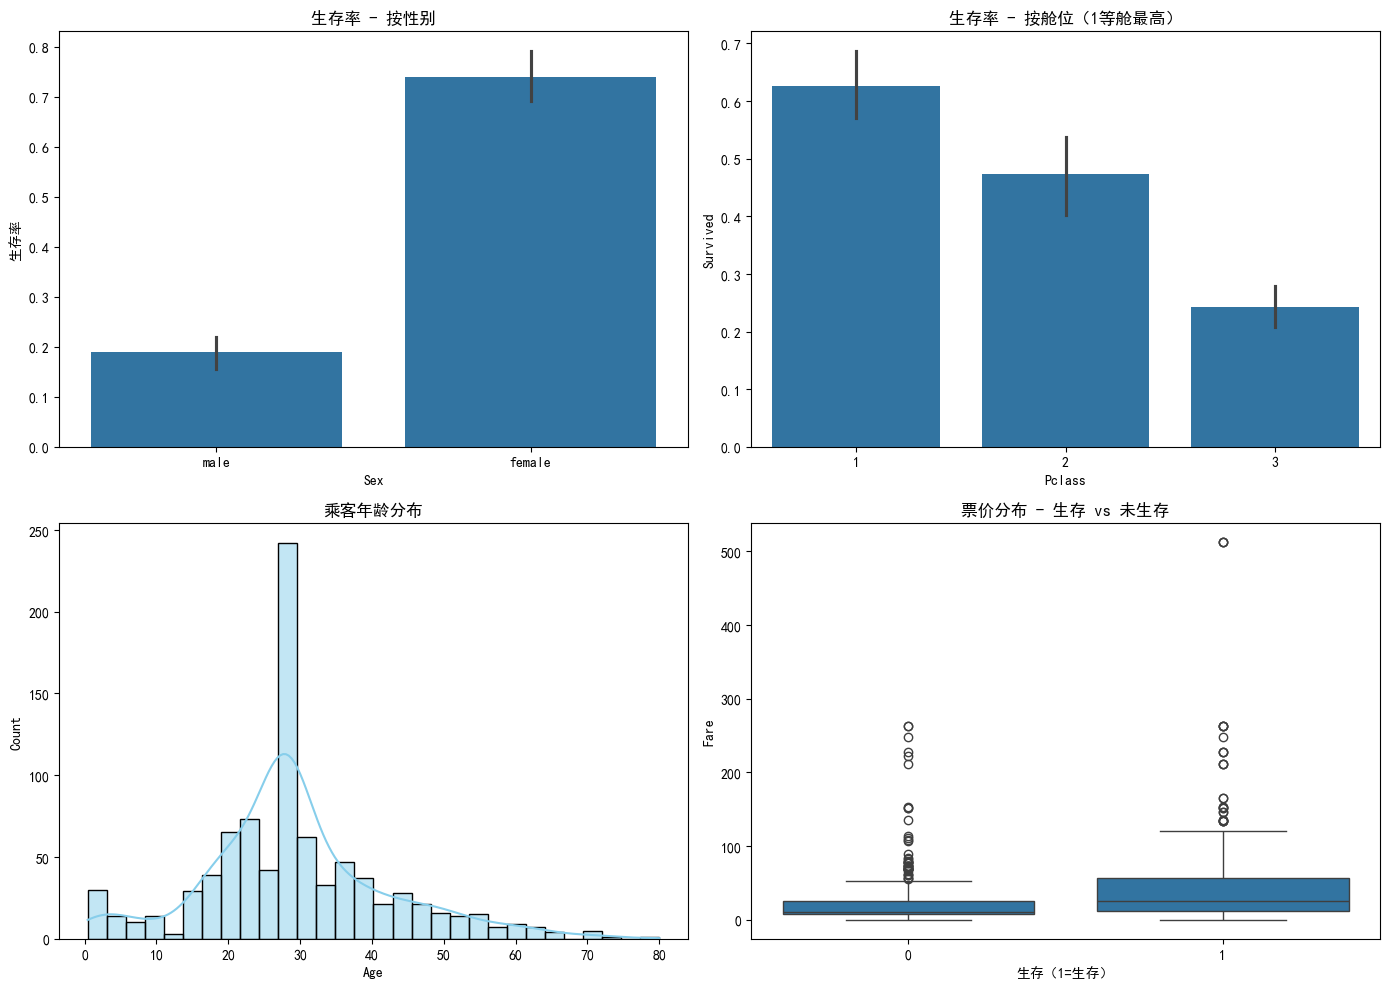

In [4]:
#设置画布大小
plt.figure(figsize=(14,10))

#子图1：性别vs生存率
plt.subplot(2,2,1)
sns.barplot(x='Sex',y='Survived',data=df)
plt.title('生存率 - 按性别')
plt.ylabel('生存率')

#子图2 舱位vs 生存率
plt.subplot(2,2,2)
sns.barplot(x='Pclass',y='Survived',data=df)
plt.title('生存率 - 按舱位（1等舱最高）')

#子图3：年龄分布
plt.subplot(2,2,3)
sns.histplot(df['Age'],bins=30,kde=True,color='skyblue')
plt.title('乘客年龄分布')

#子图4：票价 vs 生存（箱线图）
plt.subplot(2,2,4)
sns.boxplot(x='Survived',y='Fare',data=df)
plt.title('票价分布 - 生存 vs 未生存')
plt.xlabel('生存（1=生存）')

plt.tight_layout() #自动调整间距
plt.show()

In [5]:
df.to_csv('titanic_cleaned.csv',index=False)
print("干净数据已保存到本地：titanic_cleaned.csv")

干净数据已保存到本地：titanic_cleaned.csv
